In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [ ]:
data = pd.read_csv('creditcard.csv')


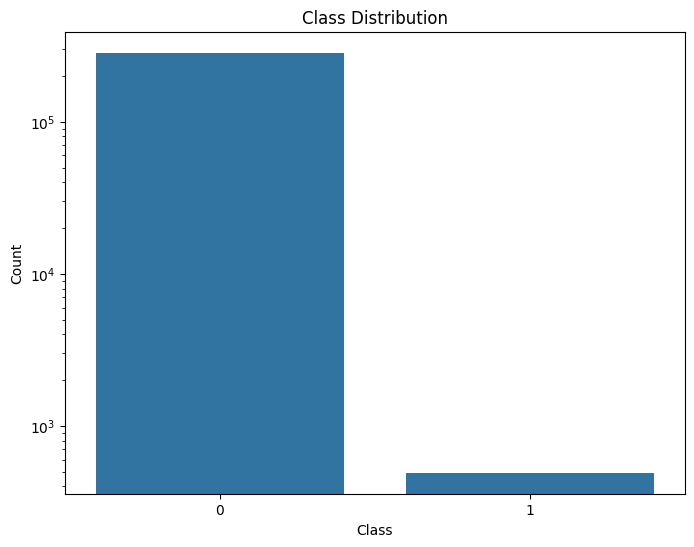

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_distribution = data['Class'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.yscale('log')

plt.show()


In [ ]:
class_distribution = data['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


Confusion Matrix without class imbalance handling:
 [[85291     6]
 [   36   110]]


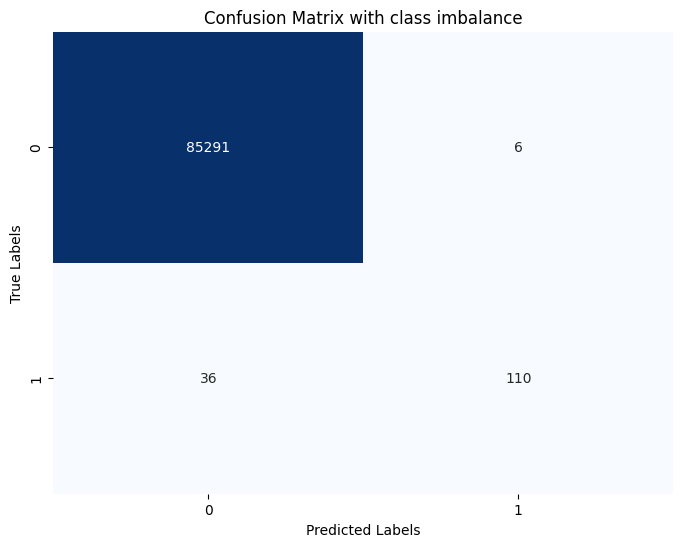

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("creditcard.csv")

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix without class imbalance handling:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with class imbalance')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Confusion Matrix:
 [[85123    26]
 [    9 85431]]


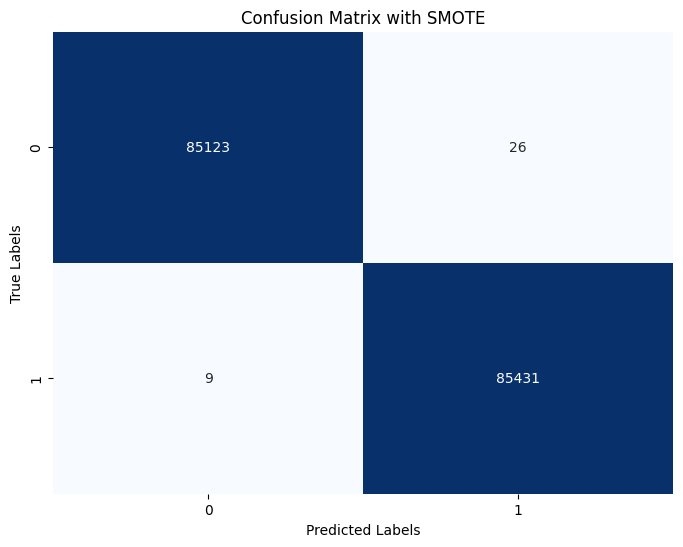

ROC AUC Score: 0.9997946579119537


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("creditcard.csv")

X = data.drop('Class', axis=1)
y = data['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=10,random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with SMOTE')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

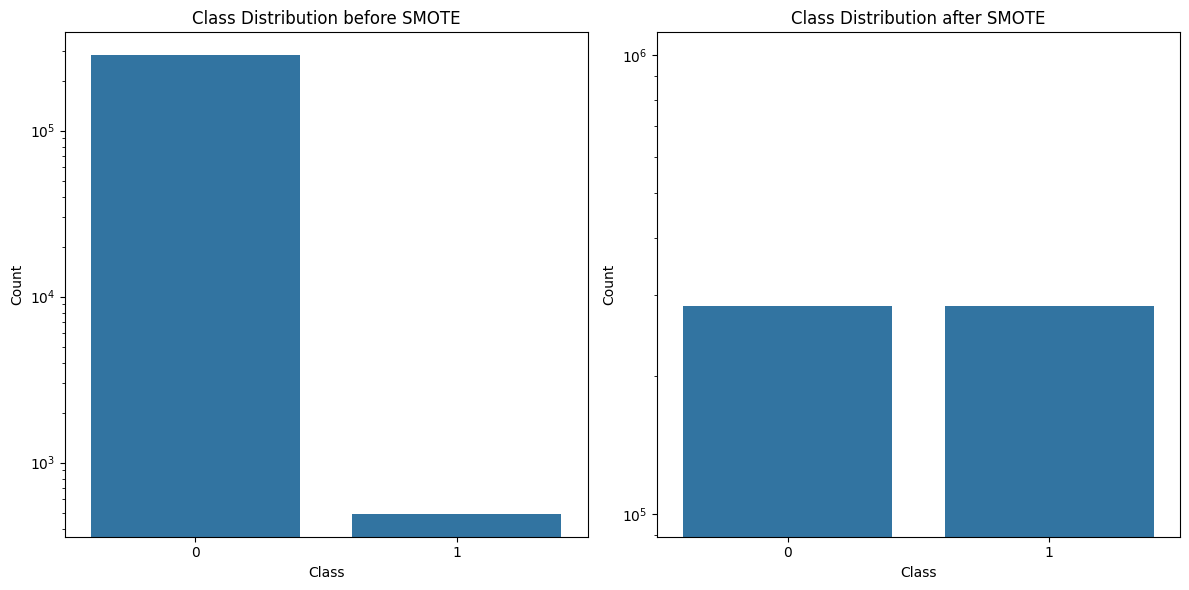

Class distribution before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('Class', axis=1)
y = data['Class']

class_counts_before = y.value_counts()

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

class_counts_after = pd.Series(y_resampled).value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=class_counts_before.index, y=class_counts_before.values)
plt.title('Class Distribution before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.barplot(x=class_counts_after.index, y=class_counts_after.values)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("Class distribution before SMOTE:")
print(class_counts_before)

print("\nClass distribution after SMOTE:")
print(class_counts_after)


Confusion Matrix with Borderline SMOTE:
 [[85143     6]
 [   22 85418]]


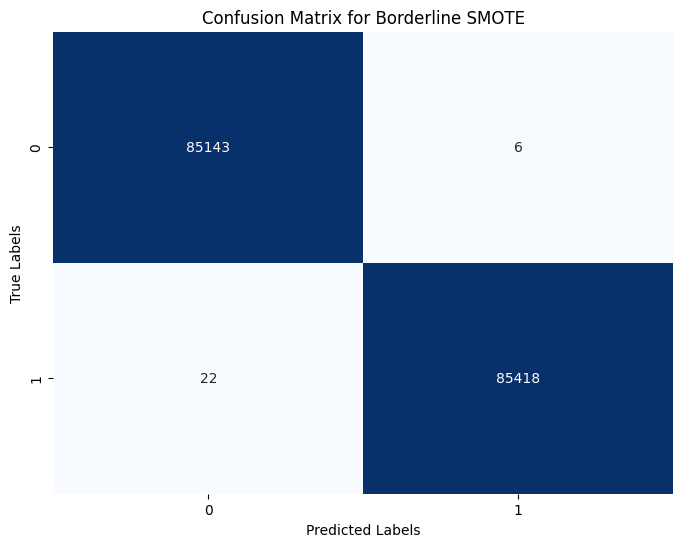

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("creditcard.csv")

X = data.drop('Class', axis=1)
y = data['Class']

borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix with Borderline SMOTE:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Borderline SMOTE')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('Class', axis=1)
y = data['Class']

class_counts_before = y.value_counts()

borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_counts_after = pd.Series(y_resampled).value_counts()


print("Class distribution before borderline SMOTE:")
print(class_counts_before)

print("\nClass distribution after borderline SMOTE:")
print(class_counts_after)


Class distribution before borderline SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution after borderline SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


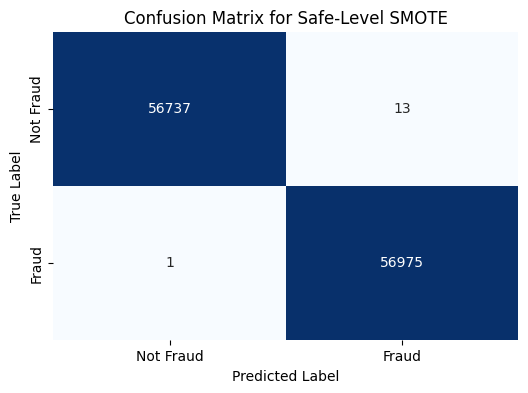

Confusion Matrix:
[[56737    13]
 [    1 56975]]


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']

safe_level_smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = safe_level_smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=10)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Safe-Level SMOTE')
plt.show()

print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SMOTEN

data = pd.read_csv('creditcard.csv')

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Regular SMOTE
smote = SMOTE(random_state=42)
X_resampled_regular, y_resampled_regular = smote.fit_resample(X_train, y_train)

model_regular_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_regular_rf.fit(X_resampled_regular, y_resampled_regular)

y_pred_regular_rf = model_regular_rf.predict(X_test)
accuracy_regular_rf = accuracy_score(y_test, y_pred_regular_rf)
precision_regular_rf = precision_score(y_test, y_pred_regular_rf)
recall_regular_rf = recall_score(y_test, y_pred_regular_rf)
f1_regular_rf = f1_score(y_test, y_pred_regular_rf)

print("Regular SMOTE Results with RandomForestClassifier:")
print("Accuracy:", accuracy_regular_rf)
print("Precision:", precision_regular_rf)
print("Recall:", recall_regular_rf)
print("F1 Score:", f1_regular_rf)

# 2. Borderline SMOTE
borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X_train, y_train)

model_borderline_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_borderline_rf.fit(X_resampled_borderline, y_resampled_borderline)

y_pred_borderline_rf = model_borderline_rf.predict(X_test)
accuracy_borderline_rf = accuracy_score(y_test, y_pred_borderline_rf)
precision_borderline_rf = precision_score(y_test, y_pred_borderline_rf)
recall_borderline_rf = recall_score(y_test, y_pred_borderline_rf)
f1_borderline_rf = f1_score(y_test, y_pred_borderline_rf)

print("\nBorderline SMOTE Results with RandomForestClassifier:")
print("Accuracy:", accuracy_borderline_rf)
print("Precision:", precision_borderline_rf)
print("Recall:", recall_borderline_rf)
print("F1 Score:", f1_borderline_rf)

# 3. Safe-Level SMOTE
safe_level_smote = SMOTEN(random_state=42)
X_resampled_safe_level, y_resampled_safe_level = safe_level_smote.fit_resample(X_train, y_train)

model_safe_level_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_safe_level_rf.fit(X_resampled_safe_level, y_resampled_safe_level)

y_pred_safe_level_rf = model_safe_level_rf.predict(X_test)
accuracy_safe_level_rf = accuracy_score(y_test, y_pred_safe_level_rf)
precision_safe_level_rf = precision_score(y_test, y_pred_safe_level_rf)
recall_safe_level_rf = recall_score(y_test, y_pred_safe_level_rf)
f1_safe_level_rf = f1_score(y_test, y_pred_safe_level_rf)

print("\nSafe-Level SMOTE Results with RandomForestClassifier:")
print("Accuracy:", accuracy_safe_level_rf)
print("Precision:", precision_safe_level_rf)
print("Recall:", recall_safe_level_rf)
print("F1 Score:", f1_safe_level_rf)

results_rf = {
    "Method": ["Regular SMOTE", "Borderline SMOTE", "Safe-Level SMOTE"],
    "Accuracy": [accuracy_regular_rf, accuracy_borderline_rf, accuracy_safe_level_rf],
    "Precision": [precision_regular_rf, precision_borderline_rf, precision_safe_level_rf],
    "Recall": [recall_regular_rf, recall_borderline_rf, recall_safe_level_rf],
    "F1 Score": [f1_regular_rf, f1_borderline_rf, f1_safe_level_rf]
}

results_df_rf = pd.DataFrame(results_rf)
print("\nComparison of Analysis Parameters with RandomForestClassifier:")
print(results_df_rf)


Regular SMOTE Results with RandomForestClassifier:
Accuracy: 0.9994908886626171
Precision: 0.8709677419354839
Recall: 0.826530612244898
F1 Score: 0.8481675392670157

Borderline SMOTE Results with RandomForestClassifier:
Accuracy: 0.999403110845827
Precision: 0.9
Recall: 0.7346938775510204
F1 Score: 0.8089887640449438

Safe-Level SMOTE Results with RandomForestClassifier:
Accuracy: 0.9995611109160493
Precision: 0.9866666666666667
Recall: 0.7551020408163265
F1 Score: 0.8554913294797689

Comparison of Analysis Parameters with RandomForestClassifier:
             Method  Accuracy  Precision    Recall  F1 Score
0     Regular SMOTE  0.999491   0.870968  0.826531  0.848168
1  Borderline SMOTE  0.999403   0.900000  0.734694  0.808989
2  Safe-Level SMOTE  0.999561   0.986667  0.755102  0.855491


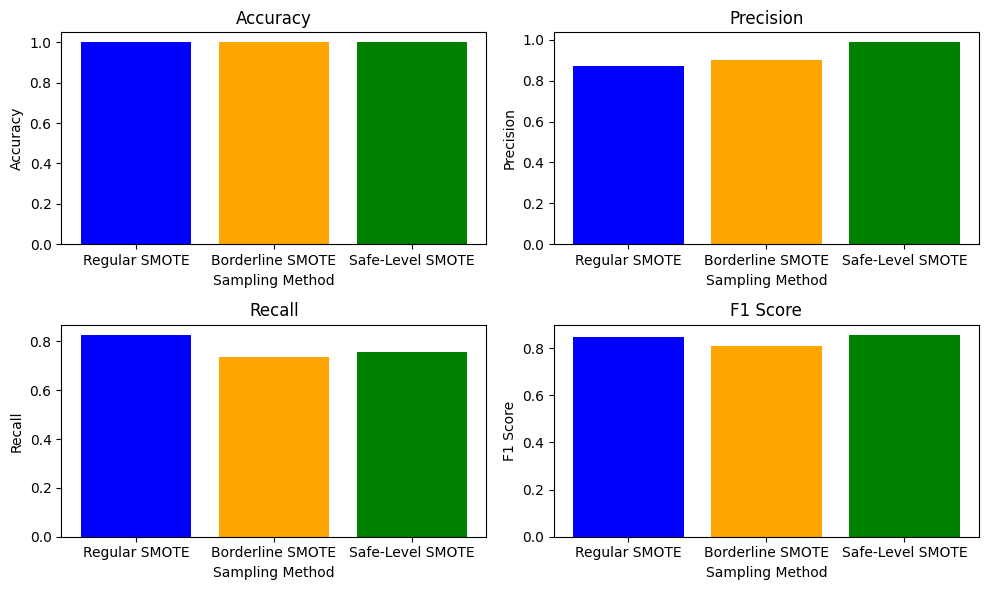

In [ ]:
plt.figure(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(results_df_rf['Method'], results_df_rf[metric], color=['blue', 'orange', 'green'])
    plt.title(metric)
    plt.xlabel('Sampling Method')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

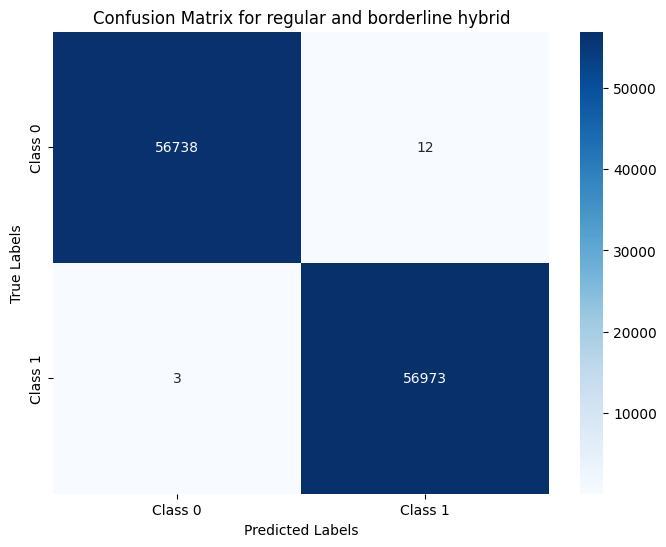

Accuracy: 0.9998681040395336
F1 Score: 0.9998683760233765
Precision: 0.9997894182679653
Recall: 0.9999473462510531


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling.base import BaseOverSampler

class HybridSMOTE(BaseOverSampler):
    def __init__(self, sampling_strategy='auto', random_state=None):
        super().__init__(sampling_strategy=sampling_strategy)
        self.random_state = random_state

    def _fit_resample(self, X, y):
        smote = SMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        X_resampled_regular, y_resampled_regular = smote.fit_resample(X, y)

        borderline_smote = BorderlineSMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X_resampled_regular, y_resampled_regular)



        return X_resampled_borderline, y_resampled_borderline

data = pd.read_csv('creditcard.csv')
X = data.drop(columns=['Class'])
y = data['Class']

hybrid_smote = HybridSMOTE(random_state=42)
X_resampled, y_resampled = hybrid_smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=10,random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for regular and borderline hybrid')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


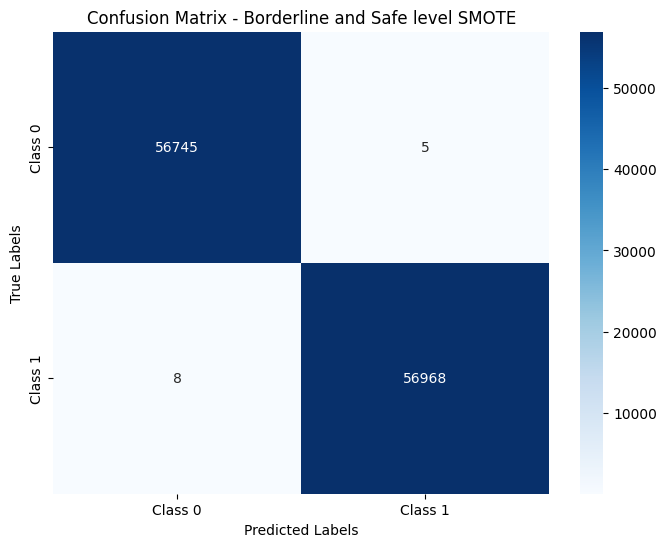

Accuracy: 0.9998856901675958
F1 Score: 0.9998859138737505
Precision: 0.9999122391308164
Recall: 0.9998595900028082


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling.base import BaseOverSampler

class HybridBorderlineSafeLevelSMOTE(BaseOverSampler):
    def __init__(self, sampling_strategy='auto', random_state=None):
        super().__init__(sampling_strategy=sampling_strategy)
        self.random_state = random_state

    def _fit_resample(self, X, y):
        borderline_smote = BorderlineSMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X, y)

        return X_resampled_borderline, y_resampled_borderline

data = pd.read_csv('creditcard.csv')
X = data.drop(columns=['Class'])
y = data['Class']

hybrid_borderline_safe_level_smote = HybridBorderlineSafeLevelSMOTE(random_state=42)
X_resampled, y_resampled = hybrid_borderline_safe_level_smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Borderline and Safe level SMOTE')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


                     Method  Accuracy  F1 Score  Precision   Recall
0  Regular Borderline SMOTE  0.999903  0.999903   0.999807  1.00000
0  BorderlineSafeLevelSMOTE  0.999886  0.999886   0.999912  0.99986


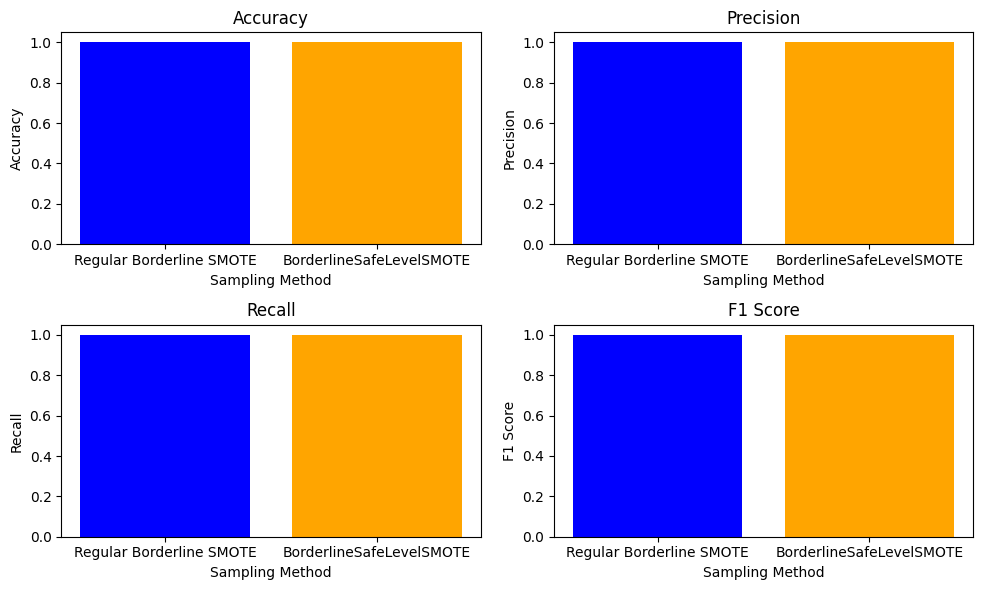

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling.base import BaseOverSampler

class HybridSMOTE(BaseOverSampler):
    def __init__(self, sampling_strategy='auto', random_state=None):
        super().__init__(sampling_strategy=sampling_strategy)
        self.random_state = random_state

    def _fit_resample(self, X, y):
        smote = SMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        X_resampled_regular, y_resampled_regular = smote.fit_resample(X, y)

        borderline_smote = BorderlineSMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X_resampled_regular, y_resampled_regular)


        return X_resampled_borderline, y_resampled_borderline

data = pd.read_csv('creditcard.csv')
X = data.drop(columns=['Class'])
y = data['Class']

hybrid_smote = HybridSMOTE(random_state=42)
X_resampled, y_resampled = hybrid_smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


accuracy1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)


class HybridBorderlineSafeLevelSMOTE(BaseOverSampler):
    def __init__(self, sampling_strategy='auto', random_state=None):
        super().__init__(sampling_strategy=sampling_strategy)
        self.random_state = random_state

    def _fit_resample(self, X, y):
        borderline_smote = BorderlineSMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X, y)

        return X_resampled_borderline, y_resampled_borderline

data = pd.read_csv('creditcard.csv')
X = data.drop(columns=['Class'])
y = data['Class']

hybrid_borderline_safe_level_smote = HybridBorderlineSafeLevelSMOTE(random_state=42)
X_resampled, y_resampled = hybrid_borderline_safe_level_smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)

hybrid1_metrics = {'Method': 'Regular Borderline SMOTE', 'Accuracy': accuracy1, 'F1 Score': f1_1, 'Precision': precision1, 'Recall': recall1}
hybrid1_df = pd.DataFrame(hybrid1_metrics, index=[0])

hybrid2_metrics = {'Method': 'BorderlineSafeLevelSMOTE', 'Accuracy': accuracy2, 'F1 Score': f1_2, 'Precision': precision2, 'Recall': recall2}
hybrid2_df = pd.DataFrame(hybrid2_metrics, index=[0])

combined_df = pd.concat([hybrid1_df, hybrid2_df])

print(combined_df)

plt.figure(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(combined_df['Method'], combined_df[metric], color=['blue', 'orange', 'green'])
    plt.title(metric)
    plt.xlabel('Sampling Method')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()
